## 206 - Gridding Mesonet Data for KML Generation

[Youtube](https://www.youtube.com/watch?v=l9XL6chcp7g&list=PLQut5OXpV-0ir4IdllSt1iEZKTwFBa7kO&index=200)

In [5]:
import pandas as pd

In [6]:
df = pd.read_csv('https://www.mesonet.org/data/public/mesonet/current/current.csv.txt', delimiter = ',', 
                 na_values = ' ')
df.head()

,STID,NAME,ST,LAT,LON,YR,MO,DA,HR,MI,...,RELH,CHIL,HEAT,WDIR,WSPD,WMAX,PRES,TMAX,TMIN,RAIN
0,ACME,Acme,OK,34.81,-98.02,2022,8,31,13,5,...,63.0,NaN,93.0,SSE,11.0,15.0,1018.31,89.0,71.0,NaN
1,ADAX,Ada,OK,34.80,-96.67,2022,8,31,13,5,...,50.0,NaN,97.0,ESE,6.0,13.0,1017.22,93.0,72.0,NaN
2,ALTU,Altus,OK,34.59,-99.34,2022,8,31,13,5,...,66.0,NaN,93.0,SE,14.0,18.0,1017.81,87.0,74.0,0.09
3,ALV2,Alva,OK,36.71,-98.71,2022,8,31,13,5,...,31.0,NaN,90.0,ESE,9.0,14.0,1018.61,92.0,63.0,NaN
4,ANT2,Antlers,OK,34.25,-95.67,2022,8,31,13,5,...,56.0,NaN,98.0,SE,5.0,10.0,1017.07,90.0,70.0,NaN


In [9]:
print(len(df))
df.dropna(subset = ['TAIR', 'LAT', 'LON'], inplace = True)
print(len(df))

120
117


In [17]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt

In [18]:
data_proj = ccrs.PlateCarree()
to_proj = ccrs.AlbersEqualArea(central_longitude = -97, central_latitude = 38)

In [19]:
from metpy.interpolate import interpolate_to_grid
import numpy as np

In [29]:
xp, yp, _ = to_proj.transform_points(data_proj, np.asarray(df['LON']), np.asarray(df['LAT'])).T

gridx, gridy, gridtemperature = interpolate_to_grid(xp, yp, df['TAIR'].values, 
                                                    interp_type = 'cressman', minimum_neighbors = 1, 
                                                    search_radius = 60000, hres = 20000)

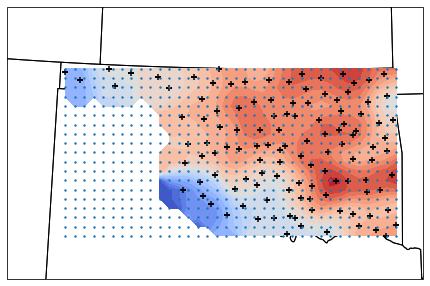

In [33]:
fig = plt.figure(figsize = (10, 5))
ax = fig.add_subplot(1, 1, 1, projection = to_proj)
ax.set_extent([-104, -94, 33, 38])
ax.add_feature(cfeature.STATES.with_scale('50m'))

cs = ax.contourf(gridx, gridy, gridtemperature, levels = 20, cmap = 'coolwarm')
ax.scatter(xp, yp, marker = '+', color = 'k', s = 30)
ax.scatter(gridx, gridy, s = 2)